<a href="https://colab.research.google.com/github/enjileona/Bootcamp-Data-Science-and-Mechine-Learning/blob/main/Mechine%20Learning_Case%20Study_Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Linear Regression

## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading Dataset

In [3]:
URL_DATA = 'https://drive.google.com/uc?id=1bN4gj2Xn0KolNzoattQU_FM3lj5ZjhMj'

df  = pd.read_csv(URL_DATA)

df.head()

,Unnamed: 0,INCOME,SAVINGS,DEBT,CREDIT_SCORE
0,0,33269,0,532304,444
1,1,77158,91187,315648,625
2,2,30917,21642,534864,469
3,3,80657,64526,629125,559
4,4,149971,1172498,2399531,473


In [4]:
df = df.drop(columns=['Unnamed: 0'])

#menghilangkan kolom tidak perlu

## EDA

In [5]:
df.info()

#tipe semua data integer

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   INCOME        1000 non-null   int64
 1   SAVINGS       1000 non-null   int64
 2   DEBT          1000 non-null   int64
 3   CREDIT_SCORE  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [6]:
df.describe(include="all")

,INCOME,SAVINGS,DEBT,CREDIT_SCORE
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,586.712000
std,113716.699591,4.429160e+05,9.817904e+05,63.413882
min,0.000000,0.000000e+00,0.000000e+00,300.000000
25%,30450.250000,5.971975e+04,5.396675e+04,554.750000
50%,85090.000000,2.738505e+05,3.950955e+05,596.000000
75%,181217.500000,6.222600e+05,1.193230e+06,630.000000
max,662094.000000,2.911863e+06,5.968620e+06,800.000000


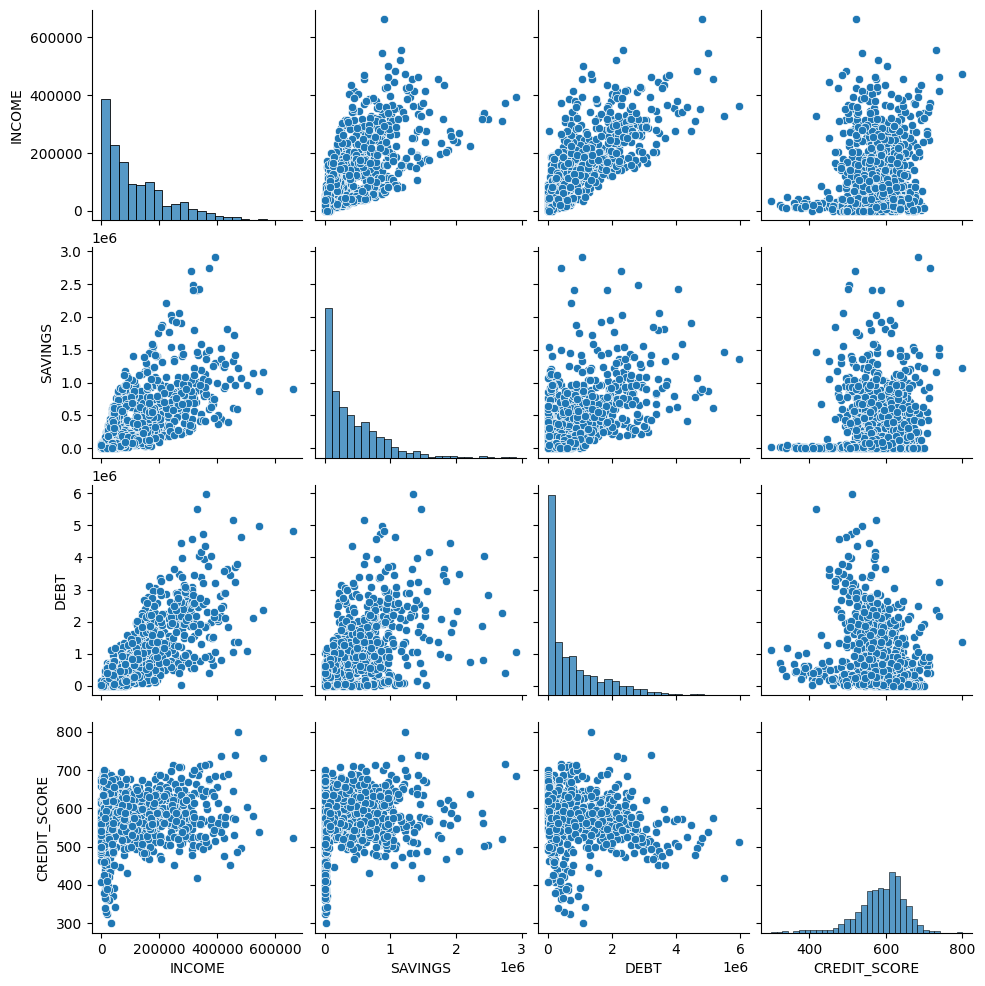

In [7]:
sns.pairplot(df)
plt.show()

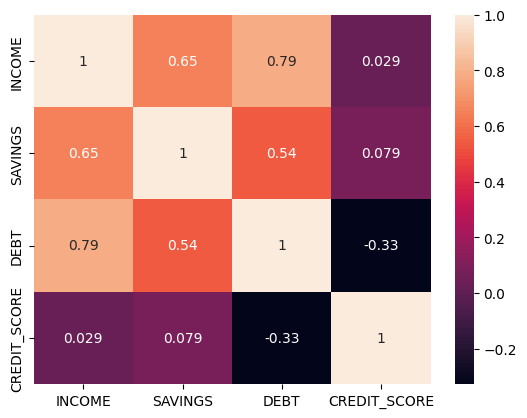

In [8]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

Untuk membaca heatmap, pahami legenda yang menjelaskan setiap warna, karena warna cerah (seperti merah atau kuning) menunjukkan intensitas tinggi atau area yang banyak berinteraksi, sementara warna gelap (seperti biru atau hijau) menunjukkan intensitas rendah atau area yang jarang diakses. Fokus pada area dengan warna paling intens (terang) untuk melihat titik-titik fokus, seperti area klik terbanyak di situs web atau area dengan kepadatan tertinggi. Perhatikan juga pola dan tren yang terbentuk dari perubahan warna antar-area untuk analisis yang lebih mendalam.

### Check VIF

#### Perhitungan VIF

Variance Inflation Factor (VIF) untuk sebuah variabel prediktor dihitung dengan langkah-langkah berikut:

1. Regresikan variabel prediktor tersebut terhadap semua variabel prediktor lainnya. Anggap saja kita ingin menghitung VIF untuk variabel INCOME. Kita akan membuat model regresi di mana INCOME adalah variabel target, dan variabel prediktornya adalah SAVINGS dan DEBT.

2. Dapatkan nilai R-squared ($R^2$$R^2$) dari regresi tersebut. Nilai $R^2$$R^2$ ini menunjukkan seberapa baik variabel prediktor tersebut dapat dijelaskan oleh kombinasi variabel prediktor lainnya.

3. Hitung VIF menggunakan rumus:

$VIF = \frac{1}{1 - R^2}$$VIF = \frac{1}{1 - R^2}$

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features for VIF calculation
features = df[['INCOME', 'SAVINGS', 'DEBT']]

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i)
                   for i in range(features.shape[1])]

print(vif_data)

   feature       VIF
0   INCOME  6.153808
1  SAVINGS  3.106705
2     DEBT  4.338478


Interpretasi Umum Nilai VIF:

- VIF = 1: Tidak ada multikolinearitas.
- 1 < VIF < 5: Multikolinearitas rendah hingga sedang. Umumnya dianggap dapat diterima.
- VIF >= 5 atau 10: Multikolinearitas tinggi. Ini menunjukkan bahwa variabel tersebut sangat berkorelasi dengan variabel prediktor lainnya dalam model, dan mungkin perlu dipertimbangkan untuk dihapus atau ditransformasi.

## Simple Linear Regression

In [10]:
#menggunakan 1 variabel: Debt

X = df["DEBT"].values.reshape(-1, 1)
y = df["CREDIT_SCORE"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
print("Intercept: ", lin_reg.intercept_)

print("Coefficient: ", lin_reg.coef_)

Intercept:  603.888244320965
Coefficient:  [-2.14104193e-05]


### Model Evaluation

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  mae_train = mean_absolute_error(y_train, y_train_pred)
  mse_train = mean_squared_error(y_train, y_train_pred)
  rmse_train = np.sqrt(mse_train)
  mape_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  r2_train = r2_score(y_train, y_train_pred)

  mae_test = mean_absolute_error(y_test, y_test_pred)
  mse_test = mean_squared_error(y_test, y_test_pred)
  rmse_test = np.sqrt(mse_test)
  mape_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  r2_test = r2_score(y_test, y_test_pred)

  print("Training Set Evaluation:")
  print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
  print(f"Mean Squared Error (MSE): {mse_train:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape_train:.2f}%")
  print(f"R-squared (R^2): {r2_train:.2f}")

  print("\nTesting Set Evaluation:")
  print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
  print(f"Mean Squared Error (MSE): {mse_test:.2f}")
  print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
  print(f"Mean Absolute Percentage Error (MAPE): {mape_test:.2f}%")
  print(f"R-squared (R^2): {r2_test:.2f}")

In [15]:
evaluate_regression_model(lin_reg, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Mean Absolute Error (MAE): 42.63
Mean Squared Error (MSE): 3615.83
Root Mean Squared Error (RMSE): 60.13
Mean Absolute Percentage Error (MAPE): 7.89%
R-squared (R^2): 0.10

Testing Set Evaluation:
Mean Absolute Error (MAE): 41.70
Mean Squared Error (MSE): 3472.97
Root Mean Squared Error (RMSE): 58.93
Mean Absolute Percentage Error (MAPE): 7.68%
R-squared (R^2): 0.13


## Multiple Linear Regression

In [16]:
X = df[["DEBT", "SAVINGS"]]
y = df["CREDIT_SCORE"]

In [17]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelling

In [18]:
from sklearn.linear_model import LinearRegression

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [19]:
print("Intercept: ", multiple_lin_reg.intercept_)

print("Coefficient: ", multiple_lin_reg.coef_)

Intercept:  592.2419828328897
Coefficient:  [-3.49608435e-05  5.36474205e-05]


### Model Evaluation

In [20]:
evaluate_regression_model(multiple_lin_reg, X_train_multiple, y_train_multiple, X_test_multiple, y_test_multiple)

Training Set Evaluation:
Mean Absolute Error (MAE): 40.42
Mean Squared Error (MSE): 3233.94
Root Mean Squared Error (RMSE): 56.87
Mean Absolute Percentage Error (MAPE): 7.47%
R-squared (R^2): 0.20

Testing Set Evaluation:
Mean Absolute Error (MAE): 40.79
Mean Squared Error (MSE): 3145.95
Root Mean Squared Error (RMSE): 56.09
Mean Absolute Percentage Error (MAPE): 7.48%
R-squared (R^2): 0.21


## Skema baru

In [21]:
df

,INCOME,SAVINGS,DEBT,CREDIT_SCORE
0,33269,0,532304,444
1,77158,91187,315648,625
2,30917,21642,534864,469
3,80657,64526,629125,559
4,149971,1172498,2399531,473
...,...,...,...,...
995,328892,1465066,5501471,418
996,81404,88805,680837,589
997,0,42428,30760,499
998,36011,8002,604181,507


In [22]:
df["RATIO_INCOME_SAVING"] = df["SAVINGS"] / df["INCOME"]
df["RATIO_INCOME_DEBT"] = df["DEBT"] / df["INCOME"]

In [23]:
df

,INCOME,SAVINGS,DEBT,CREDIT_SCORE,RATIO_INCOME_SAVING,RATIO_INCOME_DEBT
0,33269,0,532304,444,0.000000,16.000000
1,77158,91187,315648,625,1.181822,4.090930
2,30917,21642,534864,469,0.700003,17.299997
3,80657,64526,629125,559,0.800005,7.800005
4,149971,1172498,2399531,473,7.818165,15.999967
...,...,...,...,...,...,...
995,328892,1465066,5501471,418,4.454550,16.727287
996,81404,88805,680837,589,1.090917,8.363680
997,0,42428,30760,499,inf,inf
998,36011,8002,604181,507,0.222210,16.777679


In [24]:
df[df["DEBT"] == 0].count()

,0
INCOME,56
SAVINGS,56
DEBT,56
CREDIT_SCORE,56
RATIO_INCOME_SAVING,56
RATIO_INCOME_DEBT,56


In [25]:
df = df[df["SAVINGS"] > 0]
df = df[df["DEBT"] > 0]
df = df[df["INCOME"] > 0]

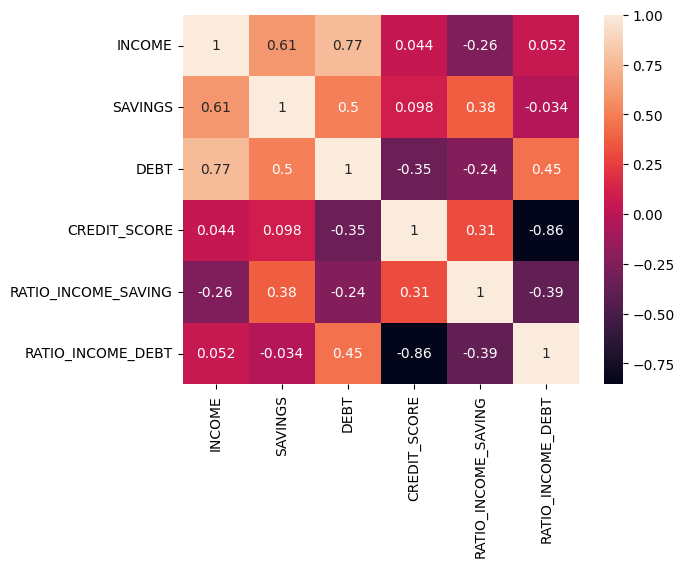

In [26]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

In [27]:
X = df[["DEBT", "RATIO_INCOME_SAVING", "RATIO_INCOME_DEBT"]]
y = df["CREDIT_SCORE"]

In [28]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

multiple_lin_reg = LinearRegression()
multiple_lin_reg.fit(X_train_multiple, y_train_multiple)

LinearRegression()

In [30]:
print("Intercept: ", multiple_lin_reg.intercept_)

print("Coefficient: ", multiple_lin_reg.coef_)

Intercept:  643.4991721420101
Coefficient:  [ 2.63686930e-06 -1.69760397e-01 -9.46967400e+00]


In [31]:
evaluate_regression_model(multiple_lin_reg, X_train_multiple, y_train_multiple, X_test_multiple, y_test_multiple)

Training Set Evaluation:
Mean Absolute Error (MAE): 24.30
Mean Squared Error (MSE): 1051.38
Root Mean Squared Error (RMSE): 32.42
Mean Absolute Percentage Error (MAPE): 4.22%
R-squared (R^2): 0.73

Testing Set Evaluation:
Mean Absolute Error (MAE): 24.50
Mean Squared Error (MSE): 1020.72
Root Mean Squared Error (RMSE): 31.95
Mean Absolute Percentage Error (MAPE): 4.19%
R-squared (R^2): 0.75


In [32]:
evaluate_regression_model(multiple_lin_reg, X_train_multiple, y_train_multiple, X_test_multiple, y_test_multiple)

Training Set Evaluation:
Mean Absolute Error (MAE): 24.30
Mean Squared Error (MSE): 1051.38
Root Mean Squared Error (RMSE): 32.42
Mean Absolute Percentage Error (MAPE): 4.22%
R-squared (R^2): 0.73

Testing Set Evaluation:
Mean Absolute Error (MAE): 24.50
Mean Squared Error (MSE): 1020.72
Root Mean Squared Error (RMSE): 31.95
Mean Absolute Percentage Error (MAPE): 4.19%
R-squared (R^2): 0.75


MAPE yang paling bagus adalah nilai yang paling kecil